In [155]:
import pandas as pd
ndviFile = pd.read_excel("ndvi_data.xls")

In [156]:
past = 7
future = 7

In [157]:
ndvi_data = ndviFile.ndvi

In [158]:
start = past
stop = len(ndvi)-future

In [159]:
data = []
for i in range(start, stop):
    s = ndvi_data[i-past: i+future] #slice
    data.append(list(s)) 

In [160]:
past_columns = []
for  i in range(past):
    past_columns.append(f"past_{i}")

In [161]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")

In [162]:
dataframe = pd.DataFrame(data, columns=(past_columns+future_columns))

In [163]:
# обучающая выборка/учебник
X = dataframe[past_columns][:-10] #данные-основа для обучения
Y = dataframe[future_columns][:-10] #данные для которых будет обучение

In [171]:
# тестовая выборка/экзаменационная
X_test = dataframe[past_columns][-10:]
Y_test = dataframe[future_columns][-10:]

In [172]:
#from sklearn.linear_model import LinearRegression
#LR = LinearRegression()
#LR.fit(X, Y)

In [173]:
import matplotlib.pyplot as mpl
from sklearn.metrics import mean_absolute_error

In [178]:
from sklearn.neighbors import KNeighborsRegressor
KNN =  KNeighborsRegressor(n_neighbors=1)
KNN.fit(X, Y)
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=200, random_state=42)
MLP.fit(X, Y)

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [5, 20],
    "max_features" : ["sqrt", "log2"],
    "n_estimators" : [100, 1000]
}

GS = GridSearchCV(RFR, params, 'neg_mean_absolute_error', cv=5, n_jobs=-1)
GS.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

week:0, errMLP: 0.04732793087633621 errKNN: 0.020285714285714285


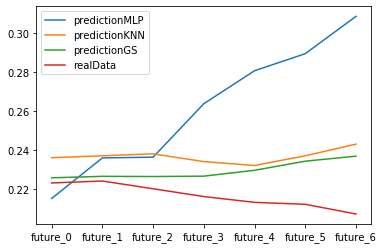

week:1, errMLP: 0.052088221104787454 errKNN: 0.02642857142857143


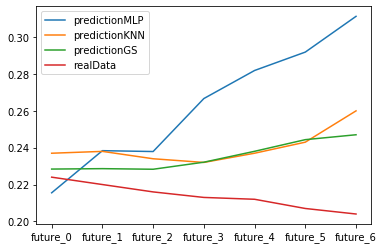

week:2, errMLP: 0.058026059197536305 errKNN: 0.029857142857142853


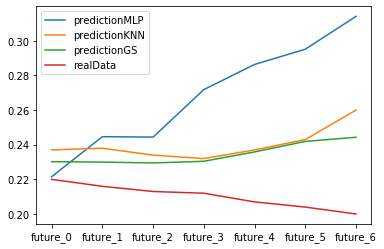

week:3, errMLP: 0.061671291451955476 errKNN: 0.032428571428571425


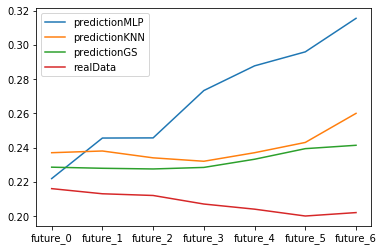

week:4, errMLP: 0.06306248510186742 errKNN: 0.033857142857142856


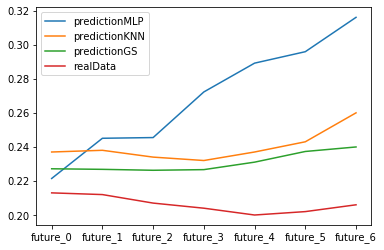

week:5, errMLP: 0.05803101599069501 errKNN: 0.034428571428571426


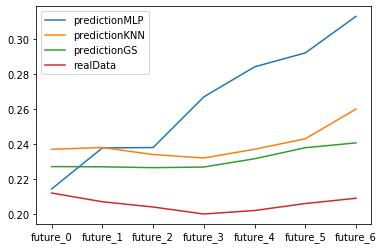

week:6, errMLP: 0.053954204739794454 errKNN: 0.034571428571428565


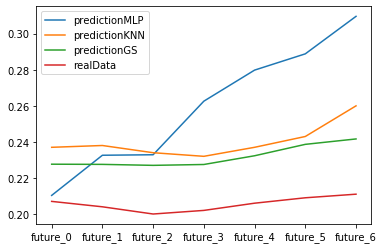

week:7, errMLP: 0.049216450443011116 errKNN: 0.03371428571428571


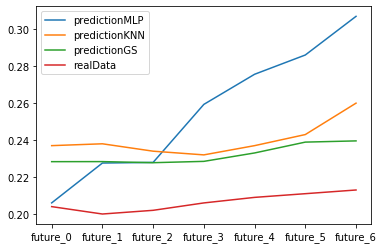

week:8, errMLP: 0.046718156719536975 errKNN: 0.028857142857142852


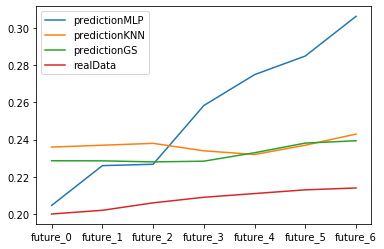

week:9, errMLP: 0.04266109644108208 errKNN: 0.02971428571428571


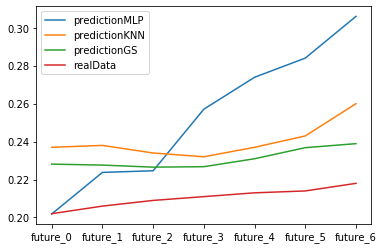

In [184]:
for i in range(10):
    predictionMLP = MLP.predict([X_test.iloc[i]])
    predictionKNN = KNN.predict([X_test.iloc[i]])
    predictionGS = GS.best_estimator_.predict([X_test.iloc[i]])
    errMLP = mean_absolute_error(predictionMLP[0], Y_test.iloc[i])
    errKNN = mean_absolute_error(predictionKNN[0], Y_test.iloc[i])
    print(f"week:{i}, errMLP: {errMLP} errKNN: {errKNN}")    
    mpl.plot(predictionMLP[0], label="predictionMLP")
    mpl.plot(predictionKNN[0], label="predictionKNN")
    mpl.plot(predictionGS[0], label="predictionGS")
    mpl.plot(Y_test.iloc[i], label="realData")
    mpl.legend()
    mpl.show()